In [1]:
# import required libraries
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# import data [Exported whatsapp chat in .txt format]
f = open(file='WhatsApp Chat with CRICKET🏏.txt', mode='r', encoding='utf-8')

In [3]:
# store file information into an variable
data = f.read()

In [4]:
# print(data)

In [5]:
pattern = '\d{2}/\d{2}/\d{2}, \d{1,2}:\d{2}\s*[ap]m\s*-\s'

In [6]:
message = re.split(pattern=pattern, string=data)[3:]
#print(message)
len(message)

707

In [7]:
dates = re.findall(pattern=pattern, string=data)[2:]
#print(dates)
#print(len(dates))

In [8]:
df = pd.DataFrame({'user_message':message, 'message_date':dates})

In [9]:
type(df['message_date']) # type caste it into datetime

pandas.core.series.Series

In [10]:
# clean the 'message_data' column to replace non-breaking spaces
df['message_date'] = df['message_date'].str.replace('\u202f', ' ')

In [11]:
# Remove the trailing '- ' from the date strings
df['message_date'] = df['message_date'].str.strip(' -')

In [12]:
df['message_date']

0      08/09/23, 7:22 pm
1      08/09/23, 7:22 pm
2      13/09/23, 6:07 pm
3      13/09/23, 6:09 pm
4      13/09/23, 6:12 pm
             ...        
702    29/08/24, 1:54 pm
703    29/08/24, 2:18 pm
704    29/08/24, 2:30 pm
705    29/08/24, 2:31 pm
706    29/08/24, 3:43 pm
Name: message_date, Length: 707, dtype: object

In [13]:
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %I:%M %p')

In [14]:
df.rename(columns={'message_date':'date'}, inplace=True)

In [15]:
df.head()

,user_message,date
0,Bambaya: <Media omitted>\n,2023-09-08 19:22:00
1,Bambaya: 🏏 Aranyam cricket buffet 🇮🇳🇵🇰\n\n🏏 In...,2023-09-08 19:22:00
2,Tarun Pandey: <Media omitted>\n,2023-09-13 18:07:00
3,Toofan Express: Chlo\n,2023-09-13 18:09:00
4,Tushar Shukla: You deleted this message\n,2023-09-13 18:12:00


In [16]:
df.shape

(707, 2)

In [17]:
# separate username and message from message data
username = []
messages = []
username_pattern = '([\w\W]+?):\s'

for message in df['user_message']:
    entry = re.split(pattern=username_pattern, string=message)
    if entry[1:]:# username
        username.append(entry[1])
        messages.append(entry[2])
    else:
        username.append('group_notification')
        messages.append(entry[0])

df['username'] = username
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,username,message
0,2023-09-08 19:22:00,Bambaya,<Media omitted>\n
1,2023-09-08 19:22:00,Bambaya,
2,2023-09-13 18:07:00,Tarun Pandey,<Media omitted>\n
3,2023-09-13 18:09:00,Toofan Express,Chlo\n
4,2023-09-13 18:12:00,Tushar Shukla,You deleted this message\n


In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute 

In [20]:
df.head()

,date,username,message,year,month,day,hour,minute
0,2023-09-08 19:22:00,Bambaya,<Media omitted>\n,2023,September,8,19,22
1,2023-09-08 19:22:00,Bambaya,,2023,September,8,19,22
2,2023-09-13 18:07:00,Tarun Pandey,<Media omitted>\n,2023,September,13,18,7
3,2023-09-13 18:09:00,Toofan Express,Chlo\n,2023,September,13,18,9
4,2023-09-13 18:12:00,Tushar Shukla,You deleted this message\n,2023,September,13,18,12


In [21]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls(text="Let's find www.google.com that have stackoverflow.com and also has www.gmail.com")
urls

['www.google.com', 'stackoverflow.com', 'www.gmail.com']

In [22]:
!source myenv/bin/activate

In [23]:
!pip install urlextract

In [24]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(text=message))

In [25]:
len(links)

5

In [26]:
x = df['username'].value_counts().head()

In [27]:
import matplotlib.pyplot as plt

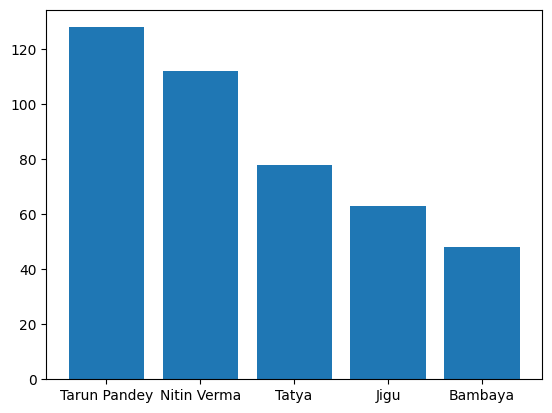

In [28]:
names = x.index
counts = x.values
plt.bar(names, counts)
plt.show()

In [29]:
x_percent = round((df['username'].value_counts()/df.shape[0])*100,2).head().reset_index().rename(columns={'username':'name', 'count':'percent'})

In [30]:
x_percent

,name,percent
0,Tarun Pandey,18.10
1,Nitin Verma,15.84
2,Tatya,11.03
3,Jigu,8.91
4,Bambaya,6.79


In [31]:
# remove group notification
temp = df[df['username']!='group_notification']

# remove media ommited message
temp = temp[temp['message']!='<Media omitted>\n']

# remove stop words
f = open(file='stop_hinglish.txt', mode='r')
stop_words = (f.read())

words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    words.extend((message.split()))

from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,birthday,137
1,"नगर,",104
2,happy,103
3,पाणीपुरवठा,100
4,Happy,85
5,hai,77
6,ते,64
7,रोजी,62
8,सकाळी,58
9,Birthday,53


In [32]:
# analyzing emojis
import emoji

emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🎂,71
1,😂,46
2,🥳,45
3,🙏,25
4,🍺,19
...,...,...
64,✌,1
65,👌,1
66,🙄,1
67,❣,1


#### monthly timeline

In [33]:
df['month_num'] = df['date'].dt.month
df.head()

,date,username,message,year,month,day,hour,minute,month_num
0,2023-09-08 19:22:00,Bambaya,<Media omitted>\n,2023,September,8,19,22,9
1,2023-09-08 19:22:00,Bambaya,,2023,September,8,19,22,9
2,2023-09-13 18:07:00,Tarun Pandey,<Media omitted>\n,2023,September,13,18,7,9
3,2023-09-13 18:09:00,Toofan Express,Chlo\n,2023,September,13,18,9,9
4,2023-09-13 18:12:00,Tushar Shukla,You deleted this message\n,2023,September,13,18,12,9


In [34]:
time_line = df.groupby(by=['year', 'month']).count()['message'].reset_index()
time = []
for i in range(time_line.shape[0]):
    time.append(time_line['month'][i] + '-' + str(time_line['year'][i]))
time_line['time'] = time
time_line

,year,month,message,time
0,2023,December,12,December-2023
1,2023,November,28,November-2023
2,2023,October,62,October-2023
3,2023,September,45,September-2023
4,2024,April,33,April-2024
5,2024,August,106,August-2024
6,2024,February,14,February-2024
7,2024,January,4,January-2024
8,2024,July,73,July-2024
9,2024,June,124,June-2024


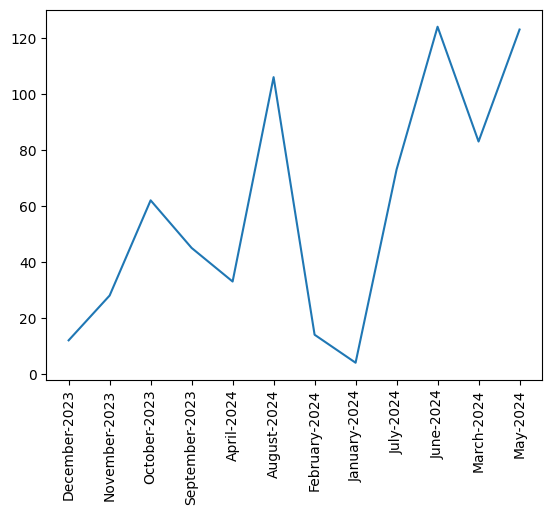

In [35]:
plt.plot(time_line['time'], time_line['message'])
plt.xticks(rotation=90)
plt.show()

### daily timeline

In [41]:
df['only_date'] = df['date'].dt.date
df.head()

,date,username,message,year,month,day,hour,minute,month_num,day_num,only_date
0,2023-09-08 19:22:00,Bambaya,<Media omitted>\n,2023,September,8,19,22,9,2023-09-08,2023-09-08
1,2023-09-08 19:22:00,Bambaya,,2023,September,8,19,22,9,2023-09-08,2023-09-08
2,2023-09-13 18:07:00,Tarun Pandey,<Media omitted>\n,2023,September,13,18,7,9,2023-09-13,2023-09-13
3,2023-09-13 18:09:00,Toofan Express,Chlo\n,2023,September,13,18,9,9,2023-09-13,2023-09-13
4,2023-09-13 18:12:00,Tushar Shukla,You deleted this message\n,2023,September,13,18,12,9,2023-09-13,2023-09-13


In [46]:
daily_timeline = df.groupby(by=['only_date']).count()['message'].reset_index()
daily_timeline

,only_date,message
0,2023-09-08,2
1,2023-09-13,4
2,2023-09-14,7
3,2023-09-17,2
4,2023-09-18,1
...,...,...
74,2024-08-14,9
75,2024-08-15,17
76,2024-08-19,1
77,2024-08-27,26


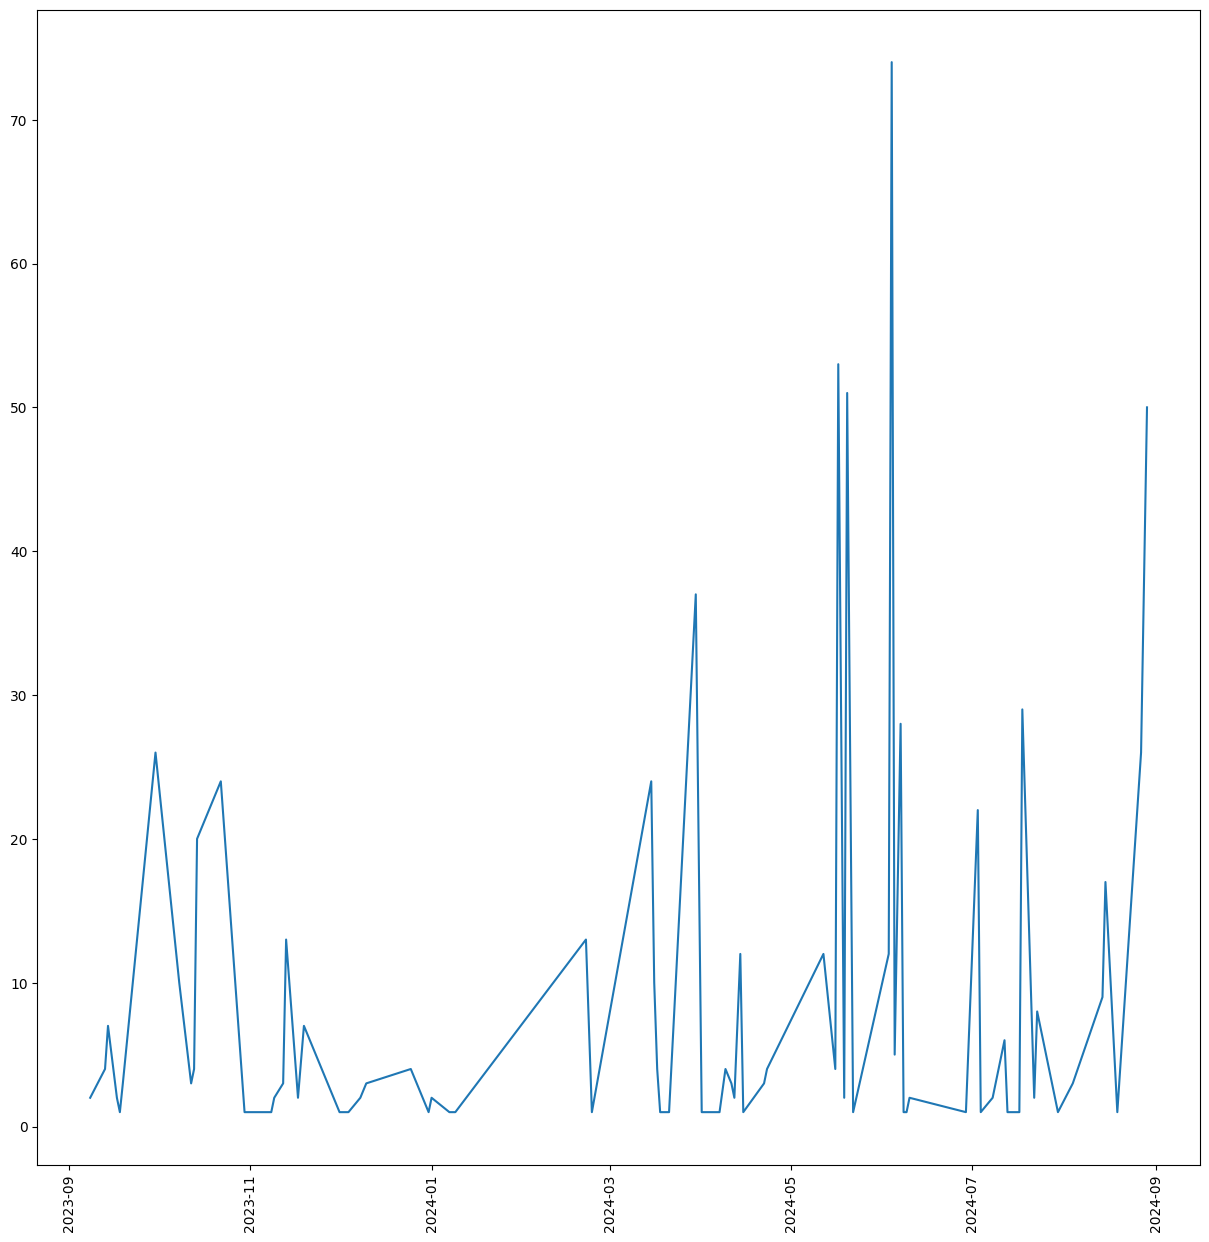

In [47]:
plt.figure(figsize=(15,15))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])
plt.xticks(rotation=90)
plt.show()

In [52]:
df['day_name'] = df['date'].dt.day_name()

In [53]:
df['day_name'].value_counts()

day_name
Friday       130
Thursday     130
Tuesday      122
Monday        98
Saturday      97
Sunday        86
Wednesday     44
Name: count, dtype: int64

In [63]:
period = []

for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + '-' + str('00'))
    elif hour == 0:
        period.append(str('00') + '-' + str(hour+1))
    else:
        period.append(str(hour) + '-' + str(hour+1))

In [68]:
df['period'] = period

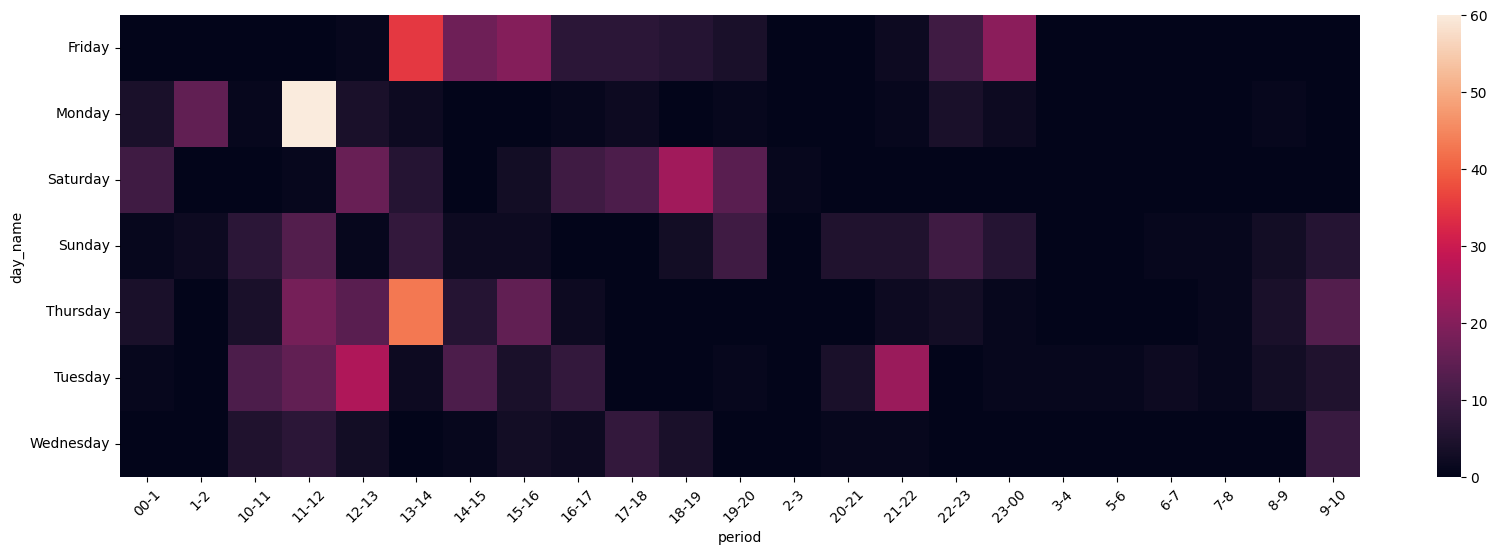

In [75]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(data=df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.xticks(rotation=45)
plt.show()